# Линейная алгебра и приложения

## Кластерный анализ: k-means и метод Варда

*Алла Тамбовцева*

### Подготовка к работе

В этом практикуме мы продолжим работать с данными по квартирам в Москве из файла `flats_cian_upd.csv`. Только вместо иерархической кластеризации воспользуемся методом k-means (однако сначала вспомним, как выглядела дендрограмма, чтобы выбрать число кластеров $k$ для k-means).

Импортируем необходимые библиотеки, модули и функции:

* библиотеку `pandas` для обработки данных;
* функции `linkage()`, `dendrogram()`, `cut_tree()` для реализации иерархического кластерного анализа;
* функцию `KMeans()` для реализации кластерного анализа методом k-means;
* функцию `StandardScaler()` для нормирования данных;
* функцию `rand_score()` для оценки согласованности результатов кластеризации.

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import rand_score

Вспомним, как выглядели данные:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allatambov/LinStat25/refs/heads/main/flats_cian_upd.csv")
df.head()

,price,lprice,square,rooms,floor,mfloor,station,metro,ametro,dmetro,link,add,lat,lon
0,12000000,16.300417,60.0,3,1,9,метро Аннино,6 минут на транспорте,0,6,https://www.cian.ru/sale/flat/314948168/,"Чертановская ул., 66К2",55.596930,37.585664
1,11499999,16.257858,37.9,1,16,20,метро Аннино,19 минут пешком,1,19,https://www.cian.ru/sale/flat/315677385/,"ул. Газопровод, 15",55.589274,37.612650
2,36000000,17.399029,120.0,4,1,9,метро Аннино,7 минут на транспорте,0,7,https://www.cian.ru/sale/flat/309425036/,"Старокачаловская ул., 14",55.569708,37.587596
3,13490000,16.417459,48.8,2,10,12,метро Аннино,15 минут пешком,1,15,https://www.cian.ru/sale/flat/316119734/,"ул. Газопровод, 3К1",55.592418,37.604187
4,11900000,16.292049,41.9,1,14,14,метро Аннино,16 минут пешком,1,16,https://www.cian.ru/sale/flat/316733228/,"Старобитцевская ул., 15К1",55.575022,37.586338


Переменные в файле:

* `price`: цена в рублях;
* `lprice`: логарифм цены;
* `square`: площадь квартиры, в кв. метрах;
* `rooms`: число комнат;
* `floor`: этаж;
* `mfloor`: число этажей в доме;
* `station`: станция метро;
* `metro`: доступность и расстояние до метро;
* `ametro`: шаговая доступность метро (1 – да, 0 – нет);
* `dmetro`: расстояние до метро (на транспорте или пешком), в минутах;
* `link`: ссылка на объявление;
* `add`: адрес;
* `lat`: широта;
* `lon`: долгота.

Немного изменим задачу, которая была в прошлый раз. Агрегируем данные – сгруппируем квартиры по ближайшей станции метро и вычислим среднюю цену, площадь, число комнат, этаж и расстояние до метро:

In [3]:
df_agg = df.groupby("station")[["price", "square", "rooms", 
                                "floor", "dmetro"]].mean()
print(df_agg.shape)
df_agg.head()

(146, 5)


,price,square,rooms,floor,dmetro
station,,,,,
метро Авиамоторная,2.777304e+07,65.601538,2.307692,8.630769,9.076923
метро Автозаводская,3.982362e+07,74.584545,2.127273,11.145455,11.236364
метро Алексеевская,3.153955e+07,68.810241,2.204819,9.367470,9.680723
метро Алма-Атинская,1.775000e+07,59.725000,2.500000,6.750000,14.000000
метро Алтуфьево,1.395631e+07,53.087805,2.146341,6.902439,8.439024


Теперь единица анализа – станция метро, и нам необходимо кластеризовать станции метро на основе характеристик квартир в их окрестности. То есть, 146 станций надо разбить на группы в зависимости от стоимости и качества недвижимости вокруг.

Стандартизируем данные:

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(df_agg)

### Вспоминаем иерархический кластерный анализ и выбираем число кластеров

Выполним кластеризацию, используя метод Варда (автоматически задействует подходящую метрику – квадрат евклидова расстояния):

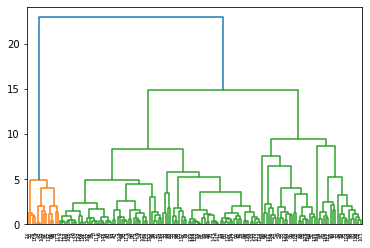

In [5]:
hc = linkage(X, method = "ward")
dendrogram(hc);

Выделим три кластера и сохраним числовые метки групп как `clusters_ward`:

In [6]:
clusters_ward = cut_tree(hc, n_clusters = 3).reshape(-1, )
print(clusters_ward)

[0 0 0 0 0 1 0 2 0 0 1 0 1 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 2 0 0 0 0 1 1 0 0 1 2 0 1 1 1 0 0 2 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 2 0
 0 1 1 0 1 0 1 2 0 0 0 1 1 0 1 0 0 2 0 2 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 2 1
 0 0 0 0 1 1 2 2 1 1 1 0 0 0 0 1 0 0 0 0 1 2 0 0 1 0 0 1 0 1 0 0 0 0 0]


**Важно:** нет гарантиии, что Python занумерует кластеры ровно так же, как на дендрограмме, слева направо (самый левый кластер – номер 0, самый правый – номер 2), поэтому при оценке результатов или сравнении разных способов кластеризации стоит ориентироваться не на номера групп, а на то, какие наблюдения туда входят и на то, похож ли состав групп в разных вариантах деления на кластеры).

### Реализуем кластеризацию методом k-means

Теперь реализуем кластерный анализ методом k-means с числом кластеров $k=3$. Так как на первом шаге алгоритм распределяет наблюдения на кластеры случайно (точнее, случайно «расставляет» центроиды и на основе близости к ним относит наблюдения к группам), для воспроизводимости результатов зафиксируем стартовую точку алгоритма `random_state`:

In [7]:
# random_state – любое целое неотрицательное число
# если все укажем 1234, результаты должны получиться одинаковыми

kmeans = KMeans(n_clusters=3, random_state=1234).fit(X)

**Поянения к коду.** Функция `KMeans()` создаёт объект класса `sklearn.cluster._kmeans.KMeans`, на него можно смотреть как на хранилище результатов, из которого можно извлечь отдельные элементы, например, метки кластеров, координаты центроидов, число итераций, которое потребовалось для получения итогового деления на группы. Часть кода `KMeans(n_clusters=3, random_state=1234)` резервирует место под «пустое» хранилище для результатов деления на три кластера, а метод `.fit()` применяет алгоритм кластеризации к данным `X`. 

Для примера запросим координаты центроидов (окончательные центры кластеры, которые получились по итогам деления на группы) – их должно быть три:

In [8]:
# три центра, пространство пятимерное – 5 показателей (столбцов) на входе
# три массива из пяти значений

print(kmeans.cluster_centers_)

[[ 0.01819447  0.32114985  0.51999801  0.23941549  0.44226741]
 [-0.50706724 -0.64477778 -0.65954386  0.05279361 -0.42676436]
 [ 2.47847849  2.22029563  1.67272556 -1.01214147  0.75173616]]


Теперь запросим метки кластеров:

In [9]:
clusters_kmeans = kmeans.labels_
print(clusters_kmeans)

[1 0 1 0 1 0 1 2 1 1 0 1 0 2 1 1 1 1 1 1 1 1 1 2 0 0 1 0 2 1 0 1 1 0 1 1 1
 1 2 0 1 1 1 0 0 0 1 0 2 1 0 0 0 1 1 2 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 2 1
 1 0 0 1 0 1 0 2 1 1 1 0 0 1 0 1 0 2 1 2 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 2 0
 1 1 0 1 0 0 2 2 0 0 0 0 1 1 1 2 1 1 1 1 0 2 1 1 0 1 1 0 1 0 1 1 1 1 1]


Если мы сравним метки кластеров с тем, что было получено ранее по результатом иерархической кластеризации методом Варда, мы увидим, что они разные:

In [10]:
print(clusters_ward)
print(clusters_kmeans)

[0 0 0 0 0 1 0 2 0 0 1 0 1 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 2 0 0 0 0 1 1 0 0 1 2 0 1 1 1 0 0 2 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 2 0
 0 1 1 0 1 0 1 2 0 0 0 1 1 0 1 0 0 2 0 2 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 2 1
 0 0 0 0 1 1 2 2 1 1 1 0 0 0 0 1 0 0 0 0 1 2 0 0 1 0 0 1 0 1 0 0 0 0 0]
[1 0 1 0 1 0 1 2 1 1 0 1 0 2 1 1 1 1 1 1 1 1 1 2 0 0 1 0 2 1 0 1 1 0 1 1 1
 1 2 0 1 1 1 0 0 0 1 0 2 1 0 0 0 1 1 2 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 2 1
 1 0 0 1 0 1 0 2 1 1 1 0 0 1 0 1 0 2 1 2 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 2 0
 1 1 0 1 0 0 2 2 0 0 0 0 1 1 1 2 1 1 1 1 0 2 1 1 0 1 1 0 1 0 1 1 1 1 1]


Однако это не значит, что результаты кардинально отличаются, просто Python по-разному занумеровал кластеры в первом и втором случае. Для сравнения имеет смысл сохранить и те, и другие метки кластеров в исходный датафрейм, а затем отфильтровать соответствующие наблюдения и сравнить состав групп. 

Главный вопрос: зачем это делать, если считается, что метод k-means даёт более точные результаты? Не всегда более точный метод может дать понятные и интересные с содержательной точки зрения кластеры, так как не всегда деление на группы стоит основывать исключительно на средних значениях показателей.

### Сравниваем результаты иерархической кластеризации и кластеризации методом k-means

Добавим столбцы с метками кластеров в датафрейм `df_agg`:

In [11]:
df_agg["ward"] =  clusters_ward
df_agg["kmeans"] = clusters_kmeans
df_agg.head()

,price,square,rooms,floor,dmetro,ward,kmeans
station,,,,,,,
метро Авиамоторная,2.777304e+07,65.601538,2.307692,8.630769,9.076923,0,1
метро Автозаводская,3.982362e+07,74.584545,2.127273,11.145455,11.236364,0,0
метро Алексеевская,3.153955e+07,68.810241,2.204819,9.367470,9.680723,0,1
метро Алма-Атинская,1.775000e+07,59.725000,2.500000,6.750000,14.000000,0,0
метро Алтуфьево,1.395631e+07,53.087805,2.146341,6.902439,8.439024,0,1


Отфильтруем строки, соответствующие каждому кластеру, по итогам иерархической кластеризации:

In [12]:
cluster0_ward = df_agg[df_agg["ward"] == 0]
cluster1_ward = df_agg[df_agg["ward"] == 1]
cluster2_ward = df_agg[df_agg["ward"] == 2]

Посмотрим на станции метро в кластерах 0, 1 и 2:

In [13]:
# .index, потому что названия станций сохранены как названия строк
# sorted() – сортируем по алфавиту для удобства

print("0", sorted(cluster0_ward.index))
print("1", sorted(cluster1_ward.index))
print("2", sorted(cluster2_ward.index))

0 ['метро Авиамоторная', 'метро Автозаводская', 'метро Алексеевская', 'метро Алма-Атинская', 'метро Алтуфьево', 'метро Аннино', 'метро Аэропорт', 'метро Багратионовская', 'метро Беломорская', 'метро Борисово', 'метро Бульвар Адмирала Ушакова', 'метро Бульвар Дмитрия Донского', 'метро Бунинская аллея', 'метро Варшавская', 'метро Водный стадион', 'метро Войковская', 'метро Волгоградский проспект', 'метро Волоколамская', 'метро Воронцовская', 'метро Давыдково', 'метро Дмитровская', 'метро Домодедовская', 'метро Дубровка', 'метро Зябликово', 'метро Измайловская', 'метро Кантемировская', 'метро Каширская', 'метро Кожуховская', 'метро Коломенская', 'метро Коммунарка', 'метро Комсомольская', 'метро Красные Ворота', 'метро Крестьянская Застава', 'метро Кузьминки', 'метро Лесопарковая', 'метро Лианозово', 'метро Лухмановская', 'метро Люблино', 'метро Марьина Роща', 'метро Медведково', 'метро Митино', 'метро Мякинино', 'метро Нахимовский проспект', 'метро Нижегородская', 'метро Новогиреево', 'ме

Что видно?

* Кластер 2: «первое кольцо», Бульварное кольцо и Хамовники;
* Кластер 1: «второе кольцо», не самый центр, но вполне элитные районы с новой застройкой (Москва-Сити, Тропарево) или со старой застройкой (Белорусская-Маяковская, Октябрьское Поле-Щукинская);
* Кластер 0: удаленные от центра станции, несильно дорогое жилье.

Проделаем то же для результатов k-means:

In [14]:
cluster0_kmeans = df_agg[df_agg["kmeans"] == 0]
cluster1_kmeans = df_agg[df_agg["kmeans"] == 1]
cluster2_kmeans = df_agg[df_agg["kmeans"] == 2]

In [15]:
print("0", sorted(cluster0_kmeans.index))
print("1", sorted(cluster1_kmeans.index))
print("2", sorted(cluster2_kmeans.index))

0 ['метро Автозаводская', 'метро Алма-Атинская', 'метро Аминьевская', 'метро Бауманская', 'метро Белорусская', 'метро Воронцовская', 'метро Генерала Тюленева', 'метро Дмитровская', 'метро Достоевская', 'метро Зюзино', 'метро Кожуховская', 'метро Косино', 'метро Красносельская', 'метро Красные Ворота', 'метро Крылатское', 'метро Курская', 'метро Кутузовская', 'метро Ленинский проспект', 'метро Марксистская', 'метро Маяковская', 'метро Минская', 'метро Мичуринский проспект', 'метро Москва-Сити', 'метро Новаторская', 'метро Новые Черёмушки', 'метро Озёрная', 'метро Октябрьское Поле', 'метро Павелецкая', 'метро Петровский парк', 'метро Петровско-Разумовская', 'метро Пионерская', 'метро Площадь Ильича', 'метро Проспект Мира', 'метро Пушкинская', 'метро Раменки', 'метро Рижская', 'метро Севастопольская', 'метро Славянский бульвар', 'метро Сокол', 'метро Спортивная', 'метро Сухаревская', 'метро Таганская', 'метро Терехово', 'метро Тропарёво', 'метро Трубная', 'метро Тульская', 'метро Универси

При внимательном изучении списков можно установить, какие кластеры по итогам иерархической кластеризации и k-means получились наиболее похожими. Если смотреть на вопрос сравнения более формально, можем перейти к множествам и установить, какие кластеры содержат наибольшее число совпадений:

In [16]:
# превращаем в множества, множество - set

set0_ward = set(cluster0_ward.index)
set1_ward = set(cluster1_ward.index)
set2_ward = set(cluster2_ward.index)

set0_kmeans = set(cluster0_kmeans.index)
set1_kmeans = set(cluster1_kmeans.index)
set2_kmeans = set(cluster2_kmeans.index)

Сравниваем каждый кластер из `_ward` с каждым кластером из `_kmeans` (не кластеры `_ward` между собой и
не кластеры `_kmeans` между собой, кластеры в рамках одного метода не пересекаются), чтобы понять, какие кластеры похожи больше всего:

In [17]:
# метод .intersection() на множествах – пересечение
# len() – считаем число элементов в пересечении

# кластер 0 по методу Варда
print(len(set0_ward.intersection(set0_kmeans)))
print(len(set0_ward.intersection(set1_kmeans)))
print(len(set0_ward.intersection(set2_kmeans)))

9
79
0


Очевидно, что кластер 0 по итогам кластеризации методом Варда и кластер 1 по итогам k-means – самые похожие. Это не означает, что они полностью совпадают, просто совпадений больше всего. Проделаем эти операции для двух оставшихся кластеров, чтобы понимать, какие группы имеет смысл сравнивать при решении, результаты какой кластеризации нам подходят больше:

In [18]:
# кластер 1 по методу Варда
print(len(set1_ward.intersection(set0_kmeans)))
print(len(set1_ward.intersection(set1_kmeans)))
print(len(set1_ward.intersection(set2_kmeans)))

41
1
2


In [19]:
# кластер 2 по методу Варда
print(len(set2_ward.intersection(set0_kmeans)))
print(len(set2_ward.intersection(set1_kmeans)))
print(len(set2_ward.intersection(set2_kmeans)))

0
0
14


Итого, соотношение такое (примерно, кластеры не обязаны совпадать на 100%):

* кластер 0 по методу Варда – это кластер 1 по методу k-means;
* кластер 1 по методу Варда – это кластер 0 по методу k-means;
* кластер 2 по методу Варда – это кластер 2 по методу k-means (вот тут 100% сопадение!).

Пользуясь теми же операциями над множествами, можем узнать, какие районы не входят в наиболее схожие кластеры по итогам той или иной кластеризации:

In [20]:
# какие станции метро есть в кластере 0 по Варду,
# но «ушли» при кластеризации k-means

print(set0_ward.difference(set1_kmeans))

{'метро Кожуховская', 'метро Алма-Атинская', 'метро Тульская', 'метро Площадь Ильича', 'метро Автозаводская', 'метро Спортивная', 'метро Красные Ворота', 'метро Дмитровская', 'метро Воронцовская'}


Из кластера 0 со «среднестатистическими» с точки зрения недвижимости районами при реализации k-means ушли станции метро с достаточно дорогими квартирами вокруг (старые дома, высотки, «сталинки» и проч). Кажется, k-means проявляет себя хорошо. Посмотрим на остальные «перетекания» наблюдений. 

In [21]:
print(set1_ward.difference(set0_kmeans))

{'метро Жулебино', 'метро Добрынинская', 'метро Улица 1905 года'}


Из кластера 1 преимущественно со станциями «второго кольца» утекла станция метро Жулебино (удалена от центра, разумно), а также станции Добрынинская и Улица 1905 года (спорно, но эти районы неоднородные).

In [22]:
print(set2_ward.difference(set2_kmeans))

set()


В кластере 2 изменений не произошло. Наблюдения полностью совпадают и в кластеризации методом Варда, и в k-means. 

В целом, можно заключить, что уточнение состава кластеров после k-means пошло на пользу, часть станций метро логично перешла в другой кластер. Можем остановиться на результатах k-means и использовать в дальнейшем анализе полученные метки кластеров.

**Дополнительно.** В качестве формального показателя сходства двух различных разделений на группы иногда используют [индекс Ранда](https://en.wikipedia.org/wiki/Rand_index) (*Rand index*) или его скорректированный вариант. Вычисление значения этого индекса подразумевает, что метки групп могут быть разными, поэтому без корректировки этот индекс характеризует долю наблюдений, которые одинаково оказались в одних и тех же/разных группах при разных группировках. Корректировка подразумевает сравнение наблюдаемых значений компонентов индекса с ожидаемыми на основе таблицы сопряжённости. Без корректировки индекс принимает значения от 0 до 1, где 1 соответствует высокой степени совпадений между двумя группировками. С корректировкой логика та же, но индекс иногда может получаться отрицательным. 

Для вычисления нескорректированной версии индекса можно воспользоваться функцией `rand_score()` из `sklearn`:

In [23]:
print(rand_score(clusters_kmeans, clusters_ward))

0.8760510155880964


Вполне высокая согласованность, что ожидаемо, поскольку логика метода Варда и k-means схожа, и там, и там, оцениваются квадраты расстояний до центроидов кластера – вычисляется внутригрупповая дисперсия.